In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm

# Paso 1: Descargar los datos históricos de Microsoft (MSFT)
# -----------------------------------------------
# Descargamos los precios de cierre ajustados de los últimos 5 años.
ms = yf.download('MSFT', period='5y')
# Calculamos el retorno logarítmico diario.
ms['logReturn'] = np.log(ms['Close'] / ms['Close'].shift(1))
ms = ms.dropna()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


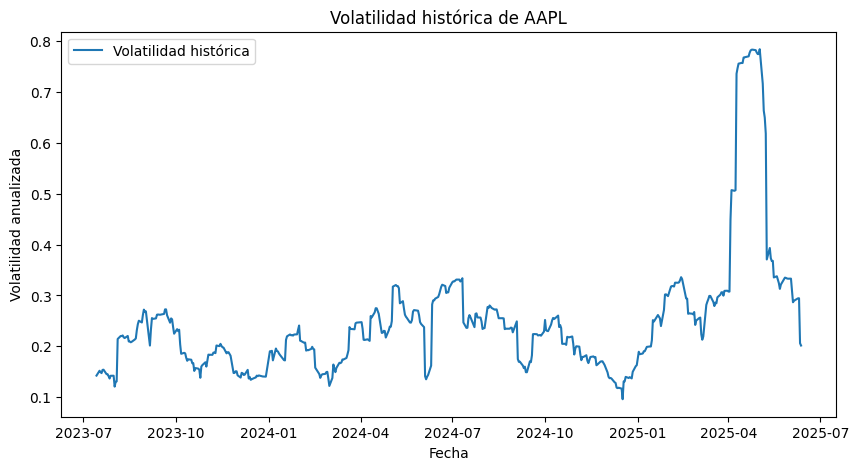

In [4]:


import matplotlib.pyplot as plt

def volatilidad_historica(ticker='MSFT', periodo='5y', ventana=21):
    """
    Calcula y grafica la volatilidad histórica (desviación estándar móvil) de un activo.
    """
    datos = yf.download(ticker, period=periodo)
    datos['logReturn'] = np.log(datos['Close'] / datos['Close'].shift(1))
    datos['volatilidad'] = datos['logReturn'].rolling(window=ventana).std() * np.sqrt(252)  # anualizada

    plt.figure(figsize=(10,5))
    plt.plot(datos['volatilidad'], label='Volatilidad histórica')
    plt.title(f'Volatilidad histórica de {ticker}')
    plt.xlabel('Fecha')
    plt.ylabel('Volatilidad anualizada')
    plt.legend()
    plt.show()

# Ejemplo de uso:
volatilidad_historica('AAPL', '2y', 21)

# CALCULO VAR PARAMETRICO

In [5]:
def var_parametrico(ticker='MSFT', periodo='2y', alpha=0.05):
    """
    Calcula el Value at Risk (VaR) paramétrico de un activo.
    """
    datos = yf.download(ticker, period=periodo)
    datos['logReturn'] = np.log(datos['Close'] / datos['Close'].shift(1))
    datos = datos.dropna()
    media = datos['logReturn'].mean()
    desv = datos['logReturn'].std(ddof=1)
    var = norm.ppf(alpha, media, desv)
    print(f"El VaR paramétrico diario al nivel {alpha} es: {var}")

# Ejemplo de uso:
var_parametrico('AAPL', '1y', 0.01)

[*********************100%***********************]  1 of 1 completed

El VaR paramétrico diario al nivel 0.01 es: -0.04732911183268531


# CALCULO DEL BETA DE UNA ACCION RESPECTO AL MERCADO

In [6]:
def calcular_beta(ticker='MSFT', benchmark='^GSPC', periodo='5y'):
    """
    Calcula el beta de una acción respecto a un índice de referencia.
    """
    datos_accion = yf.download(ticker, period=periodo)
    datos_bench = yf.download(benchmark, period=periodo)
    datos_accion['logReturn'] = np.log(datos_accion['Close'] / datos_accion['Close'].shift(1))
    datos_bench['logReturn'] = np.log(datos_bench['Close'] / datos_bench['Close'].shift(1))
    datos = pd.DataFrame({
        'accion': datos_accion['logReturn'],
        'mercado': datos_bench['logReturn']
    }).dropna()
    cov = np.cov(datos['accion'], datos['mercado'])[0,1]
    var_mercado = np.var(datos['mercado'])
    beta = cov / var_mercado
    print(f"El beta de {ticker} respecto a {benchmark} es: {beta}")

# Ejemplo de uso:
calcular_beta('AAPL', '^GSPC', '3y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


El beta de AAPL respecto a ^GSPC es: 1.23416131238202


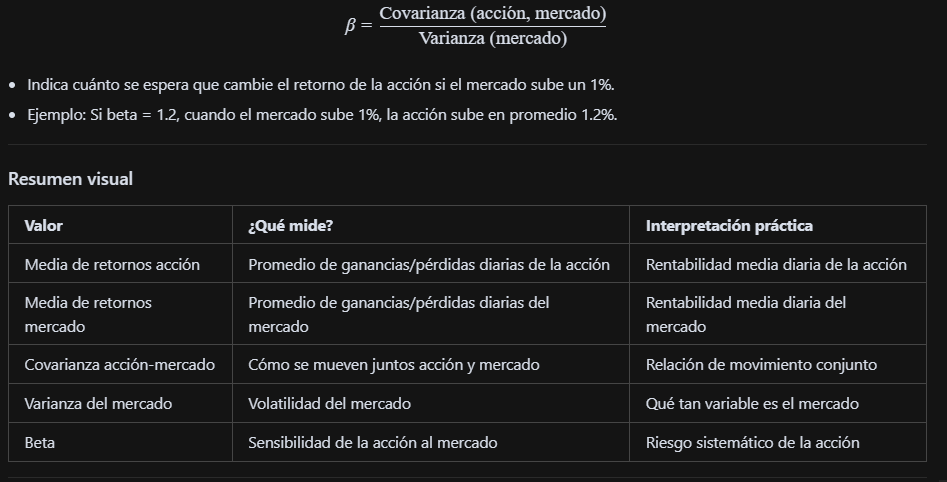

1. Media de retornos de la acción (datos['accion'].mean())

Es el promedio de los retornos logarítmicos diarios de la acción.
Indica, en promedio, cuánto gana o pierde la acción cada día.

2. Media de retornos del mercado (datos['mercado'].mean())

Es el promedio de los retornos logarítmicos diarios del índice de referencia (por ejemplo, S&P 500).
Indica, en promedio, cuánto gana o pierde el mercado cada día.

3. Covarianza acción-mercado (cov)

Mide cómo se mueven conjuntamente los retornos de la acción y del mercado.
Si es positiva, cuando el mercado sube, la acción tiende a subir también (y viceversa).
Si es negativa, cuando el mercado sube, la acción tiende a bajar.

4. Varianza del mercado (var_mercado)
Mide la dispersión de los retornos del mercado respecto a su media.
Es una medida de la volatilidad del mercado.

5. Beta (beta = cov / var_mercado)